# While Loops in Python

Module 04 focuses mostly on **for loops**, so we should have a good feel for how they work. The main feature of a for loop is that it will iterate over all of the elements in a pre-defined set or range. A **while loop** is fundamentally different from a for loop in that it continues to loop through iterations as long as the criteria specified in the conditional statement at the start of the while loop remains true. This opens up some new possibilities in how we use them.

Before we get into while loop-specific action, a good way to highlight the difference between a for loop and a while loop is to use them to do the exact same thing.

## Remember how for loops work?

We will use a for loop to print all of the integers from 1 to 11 (without first creating that list of integers manually).  We will not store those integers in a list, we will just print their values to indicate passes through the for loop.

In [1]:
for i in range(1,12):
    print(i)

1
2
3
4
5
6
7
8
9
10
11


## Try to do the same thing with a while loop

Now the same with a while loop. We will initiate the while loop by defining n as the first integer we are interested in printing (1) and then increment the value of n until I reach an integer value of 11: 

In [2]:
n = 1
while n < 12:
    print(n)
    n = n + 1

1
2
3
4
5
6
7
8
9
10
11


### Breaking down the while loop

Just like a for loop, a while loop starts with a keyword, `while` in this case. After the `while` keyword, we next have to specify what criteria we want to use to make a decision about the range that we iterate over.  In this case, I want to continue iterations until I reach the integer 11. While statements are a type of conditional statement (**Module 05**); they tell the program to execute the commands inside of the loop as long as certain criteria are met. In general, we set these criteria using statements involving comparison operators: greater than `>`, less than `<`, equal to `==`, greater than or equal to `>=`, less than or equal to `<=`, and not equal to `!=`. Optionally, they may be combined with logical operators `and`, `or`, `not` if we need to satisfy multiple criteria to continue executing the while loop. 

Here, I've chosen to run iterations as long as n < 12. After the condition(s) for the while loop are defined, we terminate the first line with a colon `:`, just as we would with a function or a for loop. Subsequent lines are then indented to indicate that they are inside the scope of the while loop. Once you return to flush left, the code is outside of the while loop scope and will not be exectued until the while loop is completed. 

In this example, we initialize the loop by defining n = 1. At the start, n = 1, so when the interpreter hits the comparison in the while statement, it finds that the criteria that n < 12 is true. It then continues into the while loop and executes the commands in the body of the loop. The value of n (1) is printed to the screen, and then we add 1 to the value of n and return to the start of the loop. Now n = 2, which is still less than 12, so things continue and repeat in the same way until it gets to n = 11.  Since 11 < 12, it makes another pass through the loop, prints 11 to the screen, and then updates the value of n one last time.  Here, it calculates that n = 12, so n < 12 is no longer satisfied, and the loop does not proceed through the next iteration. 

Compare the `for` and `while` loop versions above to get a feel for how they work and the differences between them.

## Increment operators

Now, some useful Python shorthand. **For loops** always iterate automatically over the range we specify at the start, so we don't control the value of the iterator once we have defined the set to iterate over. With a **while loop**, we generally update the value the quantity used to establish the while loop criteria on each pass. In the above example, we wanted to add 1 to our counter on every pass, and I include that in the loop by writing:

```python
n = n + 1
```
    
It looks strange to define n as an implicit function of itself, but in a programming language, this syntax evaluates the right hand side using the current value of `n`, and then it over-writes the current value of `n` with whatever the right hand side evaluates to. For example, in our first pass through the above loop, `n = 1`. Then we hit the increment step, and we say `n = n + 1`, which is evaluated as `n = 1 + 1`, so `n` is redefined as `2` at the end of the first pass. At the end of the second pass, when we hit the increment, the current state is `n = 2`, so we evaluate `n = 2 + 1`, and `n` is redefined as `3`.  This continues until our counter reaches whatever threshold we specify.

On to the shorthand:

We write increments like this so frequently, there are a number of ways we can specify them with shorthand.  For example, 

```python
n = n + 1
```

Can be expressed as

```python
n += 1
```

And

```python
x = x*5
```
    
Can be written as

```python
x *= 5
```
    
You could even write:

```python
i *= i
```
    
To update the current value of i by multiplying it by itself, i.e., you square i (though you may not want to start this one out with i = 1. If you do, you'll get stuck in the loop because 1*1 is always 1, and you'll never reach 12).
    
The link below includes a number of these operations. They can be generally extended to whatever math operation you have in mind.  This is extremely common syntax in programming, so it is worth becoming familiar with the notation now. 

https://www.w3schools.com/python/python_operators.asp

Try out a few of these different assignment operators to see how they change the behavior of your while loop in the cell below.

In [3]:
n = 1
while n < 12:
    print(n)
    n *= 3

1
3
9


## Comparing for loops and while loops for creating a list

Now one more illustration of using for loops and while loops to accomplish the same task: generating a list of integers between 10 and -10. In both cases, we start with an empty list and use the append() method to add values to it, but take a minute to think about the fundamentally different nature of for and while loops.

In [4]:
A = []
for i in range(10,-11,-1):
    A.append(i)
print(A)

B = []
n = 10
while n >= -10:
    B.append(n)
    n -= 1
print(B)

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]


Both loops give you the same result, they just have different architectures, which makes them suited to different tasks. For example, if I measured 100 discrete data points, and I wanted to perform operations on all of them, then a for loop makes sense because I'm working with an existing set. If, on the other hand, I have an application that requires me to repeat an iteration until I cross some specific threshold, then I would choose a while loop. While loops really shine when I don't have a great idea about how many iterations my loop will take, I just know that I have conditions that need to remain true or I have some idea of what the endpoint needs to be. We'll work through a few examples of engineering-type problems that you could handle by applying convergence thresholds in a while loop.

## Example 01: A Brute Force Solution to an Algebraic Equation

In subsequent modules, we'll cover **efficient and stable** ways to solve an algebraic equation using an iterative approach.  For now, we will use an **inefficient and dangerous** approach just to demonstrate what a while loop can do, and to introduce you to the idea of a tolerance on your solution. 

We have a function, $y = 5x^2 + 8x - 23$. We would like to find the **roots** for that function.  By that, I mean the values of x where y = 0.  We can do this in a number of ways.  

### Graph the function if you can

I almost always start by graphing if it is univariate (one argument).  Let's do this with numpy arrays.  Here, we are choosing numpy arrays because they allow us to broadcast operations, so it makes it easy to calculate corresponding y-values for a given set of x-values.  With lists, we'd have to write a for loop or a comprehension.

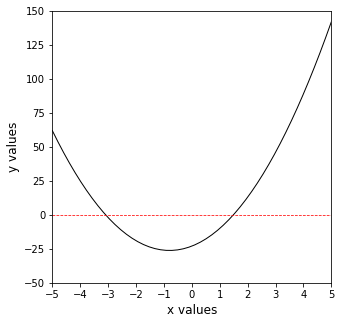

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xvals = np.linspace(-5, 5)
yvals = 5*xvals**2 + 8*xvals - 23

plt.figure(1, figsize = (5, 5))
plt.plot(xvals, yvals, linestyle = 'solid', color = 'black', linewidth = 1)
plt.hlines(0, -5, 5, color = 'red', linestyles = 'dashed', linewidth = 0.75) #add y = 0 line
plt.xlim(-5, 5)
plt.xticks(range(-5, 6, 1))
plt.ylim(-50, 150)
plt.xlabel('x values', fontsize = 12)
plt.ylabel('y values', fontsize = 12)
plt.show()

From the graph, we can clearly see there are two roots, one between -2 and -4, and one between 0 and 2.

### And don't forget the quadratic formula

Alternatively, for this particular problem, the quadratic formula is a good choice, and it tells us that y = 0 when:

$$x = 1.489$$ 

or

$$x = -3.089$$

### Guess and check?

But let's pretend we do not know a solution method like factoring or the quadratic formula.  We might revert to an iterative method like guess-and-check.  This is simple, but tedious.  The idea is that we guess a value of x, evaluate the function, and check the value of y. If the value of y is not equal to zero, then we update the value of x and try again.  In general, we will make informed guesses or use an efficient algorithm like Newton-Raphson, but for now, let's just use a while loop.

The first thing to decide is what is our tolerance on that solution, in other words, we are iterating to find the value of x where y = 0....but what exactly are we ready to accept as "equal to zero."  2 decimal places?  8 decimal places?  This is our tolerance on the solution. Since we are using a very crude approach, we will set a loose tolerance and say that we will be satified if we can find the value of x where y is between 1 and 1. A simple way to do this is with the `abs()` function in Python, which returns the absolute value of a number.  We can set this tolerance by saying we want to continue looking for the solution as long as `abs(y) > 1`. For our purposes, we'll call that "close enough" to zero that we've found a solution.  Also, we graphed this function, and it tells us that there is a root between -4 and -2, and another root between 2 and 4.  We will look for the positive root here.    

OK then, how does that look in a while loop?  We will start our iteration at x = 0.0, where we know y = -23.0.  We will then add 0.1 to x and evaluate the corresponding y at the new value of x.  We will proceed until the value of y is between -1 and 1.  Based on this iteration in the cell below, we find that the positive root is somewhere between 1.4 and 1.5, which is consistent with the true solution of `x = 1.489`.  If we wanted to get a more precise solution, we would need to a) take smaller steps in the x value and b) decrease our tolerance to something closer to zero.
        
```{warning}
We have to be ***very*** careful with this type of iteration.  The tolerance we set may require us to take smaller and smaller steps with x, otherwise we can jump right over the solution and the loop will continue infinitely.  For an example of this, try changing your tolerance to 0.1 without changing your step size in x and see what happens and why.  If you need to break the loop execution, you can do so with the stop icon in the menu bar.
```


In [6]:
x = 0.0                     #we need an initial guess for x
y = -23.0                   #y at x = 0. Set an initial y for comparison test below
while abs(y) > 1:           #as long abs(y) > 1, keep going. 
    y = 5*x**2 + 8*x - 23   #calculate the value of y at current x
    print(f'At x = {x:0.2f}, y = {y:0.2f}') #Print result of iteration to check progress
    x += 0.1                #increment x by 0.1 units.

At x = 0.00, y = -23.00
At x = 0.10, y = -22.15
At x = 0.20, y = -21.20
At x = 0.30, y = -20.15
At x = 0.40, y = -19.00
At x = 0.50, y = -17.75
At x = 0.60, y = -16.40
At x = 0.70, y = -14.95
At x = 0.80, y = -13.40
At x = 0.90, y = -11.75
At x = 1.00, y = -10.00
At x = 1.10, y = -8.15
At x = 1.20, y = -6.20
At x = 1.30, y = -4.15
At x = 1.40, y = -2.00
At x = 1.50, y = 0.25


## Example 02: Steady state suffering

As engineers, we are frequently interested in processes that are operating at steady state.  This means that conditions for that process - temperatures, concentrations, pressures, etc. - are not changing as a function of time. But it is unusual for a process to *start* at steady state.  Let's look at how long it takes for your body to reach steady state on a run!

Imagine you go out for a run.  You start out at what you feel is a decent running pace. For the first few minutes, you feel pretty good. Your heart rate is low, your breathing rate is low, you aren't really perspiring very much...and that all lasts for awhile. Then everything starts to catch up to your effort.  Your pulse increases, you are breathing more rapidly, you are beginning to perspire.  You can hang in there, you just feel like you're working now. You keep your pace/effort steady. Now, you're 20 minutes in. You're flushed, you're gasping for breath, and you are certain that death is just around the corner. You somehow keep going...keeping both your pace and your level of suffering right about constant.  

Now you've arrived at what it feels like to run at that pace - *that is steady state*. Your work output, breathing, and metabolism are all in balance and nothing is changing as a function of time (as long as you keep your effort steady). Surely you've seen this - it takes some time for the level of pain to catch up to your level of effort, but eventually everything settles in. 

Anytime you make a perturbation to a system (in this case, the perturbation is you getting off the couch and starting to run), it takes time for the system to reach steady state. One way that we watch the approach to steady state is to monitor a variable that responds to perturbation as a function of time. In the running example, we could look at your heart rate, blood lactate concentration, or respiration rate.  Eventually, they will reach steady state, and we can roughly figure out how long it took to get there. For now, let's just look at that approach to steady state in blood lactate levels.

Let's assume your blood lactate obeys the following model:


$$L = L_{SS} + (L_0 - L_{SS})\exp{(-kt)}$$

Here, $L$ is your blood lactate concentration in millimoles per liter (mM) at a given time since you started running. $L_{SS}$ is the steady state blood lactate concentration at your current, near-death exertion level when running at a steady pace, and $L_0$ is your blood lactate concentration at your more comfortable, sitting on the couch level when you started this run.

Let's say for simplicity $L_0 = 0.75$ mM, $L_{SS} = 12$ mM, and $k$ is a time constant that specifies the time scales over which your blood lactate concentration responds to your change in effort from couch to 10K.

We can use a while loop to determine how long it takes for you to reach peak, steady state suffering.  How will I determine when I'm at steady state?  I will set an absolute error tolerance of 0.01. Once I get within 0.01 mM of my known steady state lactate concentration (12 mM), I will say that I have reached steady state. This bit of code then prints out the time needed to hit steady state and also plots blood lactate as a function of time. It works by initializing time, tolerance, and your lactate level, and then it updates all of them on each pass of the loop.  Here, we increment time by a single minute with every step; you may need to adjust that step size depending on the time scale of your process.  You may question why I picked a starting tolerance of 100.  I can pick anything as long as it is larger than my threshold tolerance.  I just need something bigger than 0.01 so that I can start the loop. 

```{info}
**Another quick reminder:**  exp is not in base Python; you can either import it from the math package or use `numpy.exp()`
```

Within our tolerance specification, it will take t = 26.00 minutes to reach steady state
At time = 26.00 minutes, you are 0.07% from steady state


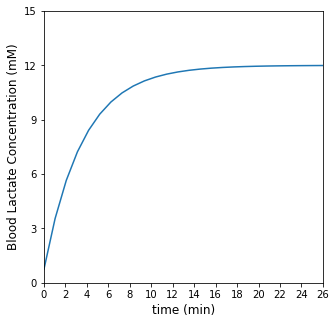

In [7]:
LSS     = 12    #mM
L0      = 0.75  #mM
k       = 0.286 #1/min
Lactate = []
Tol     = 100
t       = 0 #min
step    = 1 #min

while Tol > 0.01:
    Lactate.append(LSS + (L0 - LSS)*np.exp(-k*t))
    Tol = abs(Lactate[-1] - LSS)
    t += step

print(f'Within our tolerance specification, it will take t = {t:0.2f} minutes to reach steady state')
print(f'At time = {t:4.2f} minutes, you are {(LSS - Lactate[-1])/LSS*100:4.2f}% from steady state')

tset  = np.linspace(0, t, len(Lactate)) 
plt.figure(figsize = (5, 5))
plt.plot(tset,Lactate)
plt.xlim(0, max(tset))
plt.xticks(np.arange(0, max(tset)+1, 2))
plt.ylim(0, 15)
plt.yticks(np.arange(0, 16, 3))
plt.xlabel('time (min)', fontsize = 12)
plt.ylabel('Blood Lactate Concentration (mM)', fontsize = 12)
plt.show()